[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 38)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_16            │ (None, 1280)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 38, 256)        │      2,260,224 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 1280)           │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 38, 256)        │              0 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_5 (NotEqual)    │ (None, 38)             │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 256)            │        327,936 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 256)            │        525,312 │ dropout_11[0][0],      │
│                           │                        │                │ not_equal_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 256)            │              0 │ dense_15[0][0],        │
│                           │                        │                │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 256)            │         65,792 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 8829)           │      2,269,053 │ dense_16[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,448,317 (20.78 MB)

 Trainable params: 5,448,317 (20.78 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9.0868
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 8.9402
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 8.7067
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 8.4341
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - loss: 7.9891
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step - loss: 7.2852
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 6.3874
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - loss: 5.1100
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - loss: 3.8663
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 3.2015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


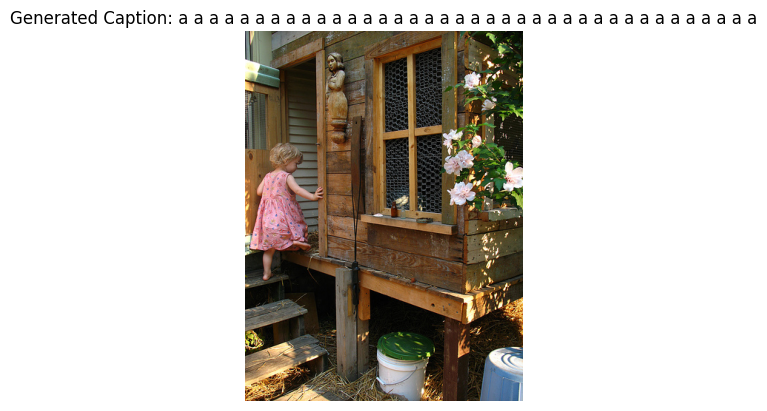

In [ ]:
# Image Captioning with EfficientNetB0 and Flickr8k Dataset

# ============================
# 1. Install and Download Dataset
# ============================
!pip install tensorflow keras pillow matplotlib nltk
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

!unzip -q Flickr8k_Dataset.zip -d images/
!unzip -q Flickr8k_text.zip -d captions/

# ============================
# 2. Preprocess Captions
# ============================
import string
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

with open('captions/Flickr8k.token.txt', 'r') as file:
    data = file.readlines()

captions_dict = {}
for line in data:
    img_id, caption = line.split('\t')
    img_id = img_id.split('#')[0]
    caption = '<start> ' + caption.strip().lower().translate(str.maketrans('', '', string.punctuation)) + ' <end>'
    captions_dict.setdefault(img_id, []).append(caption)

# ============================
# 3. Feature Extraction with EfficientNetB0
# ============================
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    feature = base_model.predict(img_array)
    return feature

# ============================
# 4. Tokenization
# ============================
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

all_captions = [cap for captions in captions_dict.values() for cap in captions]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(c.split()) for c in all_captions)

def create_sequences(tokenizer, max_length, photo, caption):
    X1, X2, y = [], [], []
    photo = photo.squeeze()
    seq = tokenizer.texts_to_sequences([caption])[0]
    for i in range(1, len(seq)):
        in_seq, out_seq = seq[:i], seq[i]
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        X1.append(photo)
        X2.append(in_seq)
        y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

# ============================
# 5. Define Model with EfficientNetB0 features
# ============================
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.models import Model

inputs1 = Input(shape=(1280,))  # EfficientNetB0 output is 1280-dim
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

# ============================
# 6. Train on One Image for Demo
# ============================
sample_img = 'images/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'
feature = extract_features(sample_img)
sample_caption = captions_dict['1000268201_693b08cb0e.jpg'][0]

X1, X2, y = create_sequences(tokenizer, max_length, feature, sample_caption)
model.fit([X1, X2], y, epochs=10)

# ============================
# 7. Generate Caption
# ============================
def generate_caption(model, tokenizer, photo, max_length):
    in_text = '<start>'
    photo = photo.squeeze()
    for _ in range(max_length):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_length)
        y_pred = model.predict([np.array([photo]), np.array(seq)], verbose=0)
        y_pred = np.argmax(y_pred)
        word = tokenizer.index_word.get(y_pred, None)
        if word is None or word == '<end>':
            break
        in_text += ' ' + word
    return in_text.replace('<start>', '').strip()

# ============================
# 8. Visual Output
# ============================
import matplotlib.pyplot as plt
from PIL import Image

photo = extract_features(sample_img)
caption = generate_caption(model, tokenizer, photo, max_length)

img = Image.open(sample_img)
plt.imshow(img)
plt.title("Generated Caption: " + caption)
plt.axis('off')
plt.show()